In [1]:
import koreanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
metro_all = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv',encoding='cp949')
metro_all.head(3)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202210,1호선,동대문,729,6,11017,1926,9398,6871,14707,...,8316,440,2216,1,191,0,0,0,0,20221103
1,202210,1호선,동묘앞,196,3,3113,1192,3766,4838,6384,...,3913,92,1782,1,306,0,0,0,0,20221103
2,202210,1호선,서울역,707,34,9180,9659,13511,55432,40840,...,14843,2421,2533,2,172,0,0,0,0,20221103


In [3]:
metro_all = metro_all.drop(columns=['작업일자'])
metro_all.head(2)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202210,1호선,동대문,729,6,11017,1926,9398,6871,14707,...,5076,8316,440,2216,1,191,0,0,0,0
1,202210,1호선,동묘앞,196,3,3113,1192,3766,4838,6384,...,1386,3913,92,1782,1,306,0,0,0,0


In [4]:
metro_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55113 entries, 0 to 55112
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           55113 non-null  int64 
 1   호선명           55113 non-null  object
 2   지하철역          55113 non-null  object
 3   04시-05시 승차인원  55113 non-null  int64 
 4   04시-05시 하차인원  55113 non-null  int64 
 5   05시-06시 승차인원  55113 non-null  int64 
 6   05시-06시 하차인원  55113 non-null  int64 
 7   06시-07시 승차인원  55113 non-null  int64 
 8   06시-07시 하차인원  55113 non-null  int64 
 9   07시-08시 승차인원  55113 non-null  int64 
 10  07시-08시 하차인원  55113 non-null  int64 
 11  08시-09시 승차인원  55113 non-null  int64 
 12  08시-09시 하차인원  55113 non-null  int64 
 13  09시-10시 승차인원  55113 non-null  int64 
 14  09시-10시 하차인원  55113 non-null  int64 
 15  10시-11시 승차인원  55113 non-null  int64 
 16  10시-11시 하차인원  55113 non-null  int64 
 17  11시-12시 승차인원  55113 non-null  int64 
 18  11시-12시 하차인원  55113 non-null  int64 
 19  12시-

In [5]:
metro_all.isnull().sum()

사용월             0
호선명             0
지하철역            0
04시-05시 승차인원    0
04시-05시 하차인원    0
05시-06시 승차인원    0
05시-06시 하차인원    0
06시-07시 승차인원    0
06시-07시 하차인원    0
07시-08시 승차인원    0
07시-08시 하차인원    0
08시-09시 승차인원    0
08시-09시 하차인원    0
09시-10시 승차인원    0
09시-10시 하차인원    0
10시-11시 승차인원    0
10시-11시 하차인원    0
11시-12시 승차인원    0
11시-12시 하차인원    0
12시-13시 승차인원    0
12시-13시 하차인원    0
13시-14시 승차인원    0
13시-14시 하차인원    0
14시-15시 승차인원    0
14시-15시 하차인원    0
15시-16시 승차인원    0
15시-16시 하차인원    0
16시-17시 승차인원    0
16시-17시 하차인원    0
17시-18시 승차인원    0
17시-18시 하차인원    0
18시-19시 승차인원    0
18시-19시 하차인원    0
19시-20시 승차인원    0
19시-20시 하차인원    0
20시-21시 승차인원    0
20시-21시 하차인원    0
21시-22시 승차인원    0
21시-22시 하차인원    0
22시-23시 승차인원    0
22시-23시 하차인원    0
23시-24시 승차인원    0
23시-24시 하차인원    0
00시-01시 승차인원    0
00시-01시 하차인원    0
01시-02시 승차인원    0
01시-02시 하차인원    0
02시-03시 승차인원    0
02시-03시 하차인원    0
03시-04시 승차인원    0
03시-04시 하차인원    0
dtype: int64

In [6]:
print(sorted(list(set(metro_all['사용월']))))

print(sorted(list(set(metro_all['지하철역']))))

print(sorted(list(set(metro_all['호선명']))))

print(len(set(metro_all['지하철역'])))

# set로 변환하여 중복제거하고 보는 값들

[201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109, 202110, 202111, 202112, 202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210]
['4.19민주묘지', '가능', '가락시장', '가산디지털단지', '가양', '가오리', '가좌', '가천대', '가평', '간석', '갈매', '강남', '강남구청', '강동', '강동구청', '강매', '강변', '강변(동서울터미널)', '강일', '강촌', '개롱', '개봉', '개포동', '개화', '개화산', '거여', '건대입구', '검암', '경기광주', '경마공원', '경복궁', '경복궁(정부서울청사)', '경찰병원', '

In [7]:
metro_all.groupby(['호선명']).mean()

,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
호선명,,,,,,,,,,,,,,,,,,,,,
1호선,201848.946809,387.164894,10.758511,6555.472340,3489.656383,7892.974468,16806.124468,17626.506383,43328.771277,26260.322340,...,13739.614894,8651.550000,1275.086170,2631.382979,19.334043,85.343617,0.232979,2.341489,0.019149,0.000000
2호선,201848.946809,266.462979,3.985319,10139.972340,2832.103404,17860.039574,16160.655957,47103.984043,39500.061064,64721.852340,...,18219.347234,21597.647872,2512.643404,6254.999149,16.676809,364.504894,1.898511,6.177447,0.113191,0.673617
3호선,201848.946809,54.647685,2.625782,4237.506884,1106.412078,10055.102941,10216.112954,27285.234355,24142.189925,33677.954944,...,6135.224656,9323.523154,675.792553,2603.294431,4.204631,91.846683,0.122340,1.363267,0.002503,0.002503
4호선,201848.946809,150.464403,5.569558,7887.824877,1424.306465,17849.860884,11218.542553,45418.102291,25057.673895,50582.429214,...,10652.868658,16879.819149,1329.695172,4619.212766,7.074059,174.653437,0.130524,1.957856,0.033961,0.057283
5호선,201855.747148,13.378769,0.296862,4617.309698,976.954971,10555.886512,6857.246740,30835.211084,16556.646088,35557.805623,...,3818.706601,8828.560106,429.723309,2545.563773,3.692543,80.336186,0.024042,1.215159,0.000407,0.000407
6호선,201851.333795,40.607707,0.714167,4205.369559,919.865816,8254.310785,4389.734128,22676.006376,9752.030773,27521.438314,...,4703.131688,8422.234821,616.002218,2426.505406,3.524258,85.286388,0.075132,0.844192,0.000554,0.000000
7호선,201846.690176,41.557095,0.704450,6639.592149,1424.560453,13369.609782,7453.520781,36000.733627,16936.848027,42595.158900,...,5486.802477,11145.883921,765.960957,3504.653023,3.614400,146.091100,0.026868,1.290302,0.001889,0.000210
8호선,201851.326290,11.014295,0.274705,4883.970168,1355.543195,10123.284649,6756.062150,27770.905531,12663.937228,35837.550653,...,3063.798633,8090.702921,429.755127,2252.330640,3.178993,140.191423,0.017402,1.158484,0.009323,0.009323
9호선,201848.946809,17.428085,0.244681,3883.358298,970.531064,8773.421702,6789.002553,24043.149362,17170.793617,26971.609362,...,4753.458298,8496.923404,642.023830,2295.286383,3.100851,89.531489,0.022553,0.471489,0.008511,0.003404


In [8]:
metro_st = metro_all.groupby(['호선명','지하철역']).mean().reset_index()

In [9]:
metro_st = metro_st.drop(columns=['사용월'])

In [10]:
metro_get_on = pd.DataFrame()
metro_get_off = pd.DataFrame()

metro_get_on['지하철역'] = metro_st['지하철역']
metro_get_on['호선명'] = metro_st['호선명']
metro_get_off['지하철역'] = metro_st['지하철역']
metro_get_off['호선명'] = metro_st['호선명']

for column in metro_st.columns:
  if '승차' in column:
    metro_get_on[[column]] = metro_st[[column]]
  elif '하차' in column:
    metro_get_off[[column]] = metro_st[[column]]

metro_get_on = metro_get_on.set_index('지하철역')
metro_get_off = metro_get_off.set_index('지하철역')

metro_get_on.head(2)



,호선명,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,1호선,610.457447,13841.819149,10665.265957,16918.819149,22716.978723,21713.404255,19770.617021,21286.744681,26098.989362,...,30553.319149,21826.691489,17402.670213,16072.914894,13629.819149,6941.680851,727.180851,8.595745,0.159574,0.000000
동묘앞,1호선,116.382979,3077.138298,3557.000000,6560.255319,9132.893617,8528.925532,9742.712766,14141.063830,19588.776596,...,27067.234043,13584.170213,7648.446809,6437.925532,4402.042553,1967.074468,197.319149,2.287234,0.159574,0.159574


In [11]:
df = pd.DataFrame(index=metro_st['지하철역'])
df['호선명'] = metro_get_on['호선명']
df['평균승차인원수'] = metro_get_on[metro_get_on.columns.difference(['호선명'])].mean(axis=1)
# difference([컬럼명]) 컬럼과 다른 이름을 가진 컬럼들을 모아줌
df['평균하차인원수'] = metro_get_off[metro_get_off.columns.difference(['호선명'])].mean(axis=1)
df['평균승하차인원수'] = df[['평균승차인원수','평균하차인원수']].sum(axis=1)
df

,호선명,평균승차인원수,평균하차인원수,평균승하차인원수
지하철역,,,,
동대문,1호선,17184.314273,18735.908245,35920.222518
동묘앞,1호선,12127.710550,12752.699025,24880.409574
서울역,1호선,64239.761525,59827.354610,124067.116135
시청,1호선,28371.504876,28565.588209,56937.093085
신설동,1호선,18428.388741,17979.496011,36407.884752
...,...,...,...,...
원덕,중앙선,515.652482,493.762411,1009.414894
중랑,중앙선,7074.472074,6721.829344,13796.301418
지평,중앙선,71.989286,68.012500,140.001786


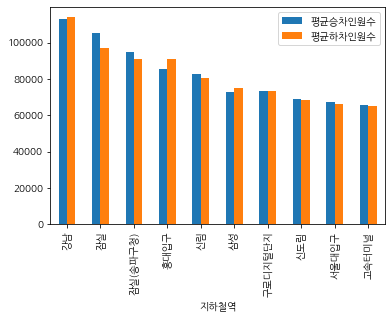

In [12]:
df.sort_values('평균승하차인원수', ascending=False)[['평균승차인원수','평균하차인원수']].head(10).plot(kind=('bar'))
plt.show()

In [13]:
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable


In [14]:
# 좌표를 구하는 패키지
from geopy.geocoders import Nominatim

In [15]:
def geocoding(address):
  geolocoder = Nominatim(user_agent='South Korea',  timeout=None)
  geo = geolocoder.geocode(address)
  if geo == None:
    return None
  crd = [str(geo.latitude), str(geo.longitude)]
  return crd

geocoding('남산')

['37.5524374', '126.988433']

In [16]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import folium

In [18]:
metro_line = df[df['호선명']=='2호선']
for i, row in enumerate(metro_line.values):
  name = metro_line.iloc[i].name
  line, avg_on, avg_off, avg_all = row

  if '(' in name:
    name = name.split('(')[0]
  if '역' in name:
    crd = geocoding(name)
  else:
    crd = geocoding(name+'역')
  
  if crd == None:
    print(f'Can not find crd {name}')
    continue
  
  if i == 0:
    map_ = folium.Map(location=crd, zoom_start=12)

  try:
    marker = folium.CircleMarker(
        crd,
        radius=avg_all/10000,
        color='red',
        fill_color='red'
    )
  except Exception as e:
    print(e)
  
  marker.add_to(map_)
map_

Can not find crd 구의
Can not find crd 구의
Can not find crd 영등포구청


In [19]:
metro_all[metro_all['지하철역']=='노량진']['호선명'].unique()

array(['9호선', '경부선'], dtype=object)